# Title: Gender Disparities in Heart Disease Risk Factors and Prevalence: Exploring the Impact of Key Predictive Variables

### INTRODUCTION

Heart disease is a significant global health concern affecting both men and women. Gender differences exist in the prevalence, risk factors, and manifestations of heart disease. Understanding these gender-specific aspects is crucial for effective prevention and treatment strategies. Factors such as cholesterol levels, age, blood pressure, electrocardiographic results, maximum heart rate achieved, and sex can contribute to heart disease development. By analyzing these key predictive variables, including their relationship with different genders, we aim to identify which gender is more affected by heart disease. This research will contribute to our knowledge of gender-specific factors influencing heart disease and facilitate the development of targeted interventions for improved cardiovascular health.

In this project, our main question revolves around determining which gender is more likely to develop heart disease based on potential contributing factors, " Which gender has more chance to get heart disease by considering the features that might cause the heart disease?". To answer this question, we will analyze various variables that are known to be associated with heart disease. By examining these variables, we aim to identify any disparities between males and females in terms of their susceptibility to heart disease. We will explore the relationship between gender and these contributing factors, seeking to understand which gender exhibits a higher risk for developing heart disease. By conducting a thorough analysis, we hope to shed light on the gender-specific aspects of heart disease and contribute to a better understanding of this health issue.

To answer our question, we will consider several useful variables that impact CP. These variables include cholesterol levels, age, resting blood pressure, resting electrocardiographic results, maximum heart rate achieved, and sex (color). By examining these factors, we can gain insights into the cardiovascular performance and better understand its relationship with these variables. 

For the preliminary exploratory data analysis, we will demonstrate that the dataset can be read from the web into R. We will organize the data into a single table with multiple columns. We will also clean and wrangle the data to ensure it is in a tidy format, making visualization easy. We will then explore the dataset using summary statistics, visualizations, and statistical tests. Our aim is to identify relationships between variables and understand the distribution of the target variable. To facilitate understanding, we color-label certain variables. Additionally, we will compare age and sex with multiple variables within the dataset, utilizing various plots to demonstrate specific relationships between them.

### METHODS & RESULTS

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Methods**: 

0. `Read` the data by the `URL` and `select` the columns:

     * `age`
     * `sex`
     * `cp`
     * `trestbps`
     * `chol`
     * `restecg`
     * `thalach`


In [2]:
heart_disease <-read_csv("heart_disease_uci.csv")

specific_data<- select(heart_disease, -num, - thal, -slope, -dataset, -oldpeak, -exang, -id, -ca, -fbs)
specific_data

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,restecg,thalch
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
63,Male,typical angina,145,233,lv hypertrophy,150
67,Male,asymptomatic,160,286,lv hypertrophy,108
67,Male,asymptomatic,120,229,lv hypertrophy,129
37,Male,non-anginal,130,250,normal,187
⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Male,typical angina,NA,139,st-t abnormality,NA
55,Male,asymptomatic,122,223,st-t abnormality,100
58,Male,asymptomatic,NA,385,lv hypertrophy,NA
62,Male,atypical angina,120,254,lv hypertrophy,93


1. Find each gender’s most chest pain type by selecting `sex` and `chest pain` type `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic` columns. Then we will create a `scatter graph` and `color` males and females differently.

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


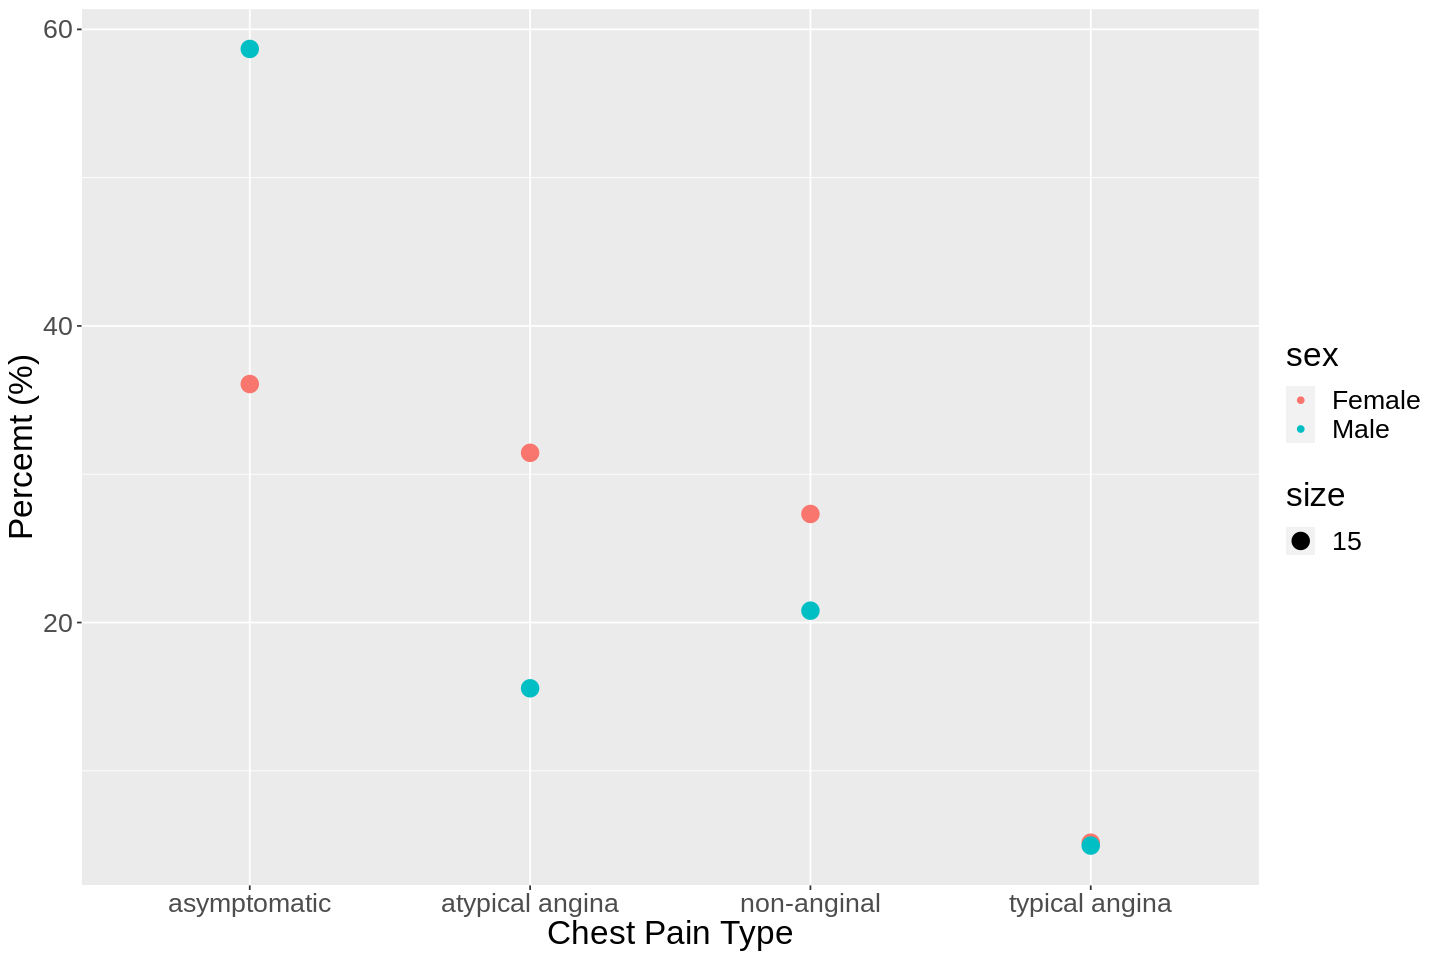

In [9]:
# Number of Female & Male
sex_dist <- specific_data |>
  group_by(sex, cp) |>
  summarize(count = n())

# Percentate of Female & Male
sex_dist_perc <- sex_dist |>
  mutate(percent = count / sum(count) * 100)


sex_dist_plot <- sex_dist_perc |>
    ggplot(aes(x = cp, y = percent, color = sex, size = 15)) +
    geom_point() +
    labs(x = "Chest Pain Type", y = "Percemt (%)") +
    theme(text = element_text(size = 20))
sex_dist_plot

2. We are comparing each gender by cholesterol and finding which gender has a higher cholesterol rate. We are going to `select` `sex` and serum `cholesterol` columns. Then we are going to `mutate` the data and find the `average chol rate` for each `sex`. Then create the bar graph of `sex` against `average chol rate` and `color` `males` and `females` differently.

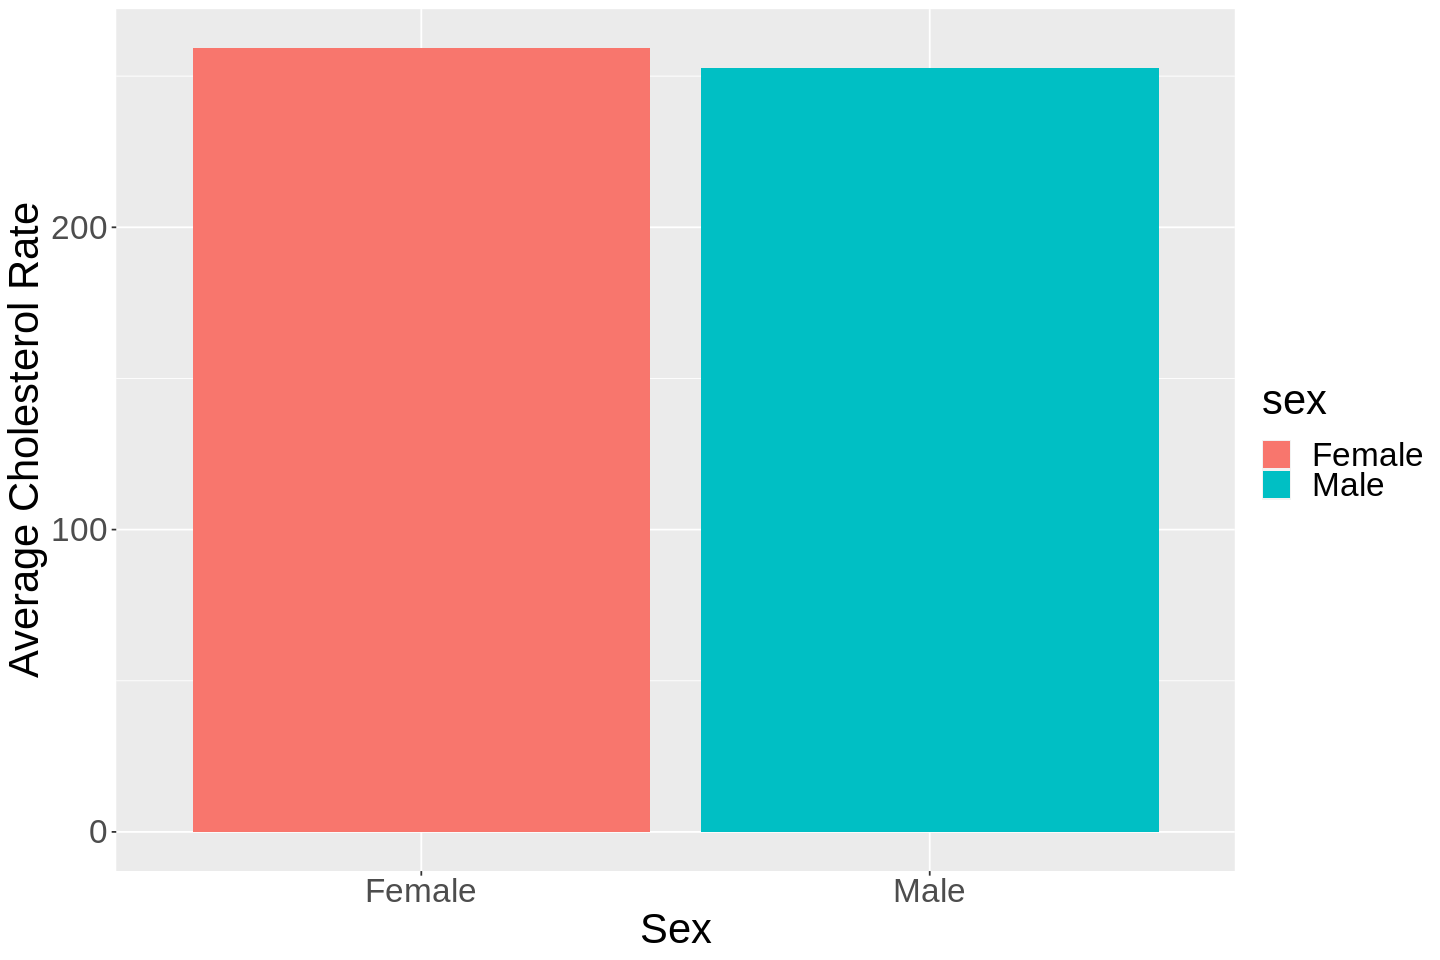

In [8]:
sex_chol <- specific_data |>
 filter(chol != "NA") |>
  group_by(sex, chol) |>
  count()

sex_chol_avrg <- sex_chol |>
  group_by(sex) |>
  summarize(avg_chol = mean(chol, na.rm = TRUE))

sex_chol_avrg_plot <- ggplot(sex_chol_avrg, aes(x = sex, y = avg_chol, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(x = "Sex", y = "Average Cholesterol Rate") + 
  theme(text = element_text(size = 25))
sex_chol_avrg_plot


3. We are comparing each gender by resting blood pressure and finding which gender has a higher resting blood pressure rate. We are going to `select` the `sex` and `resting blood pressure(trestbps)` columns. Then we are going to `mutate` the data and find the `average resting blood pressure(trestbps) rate` for each `sex`.

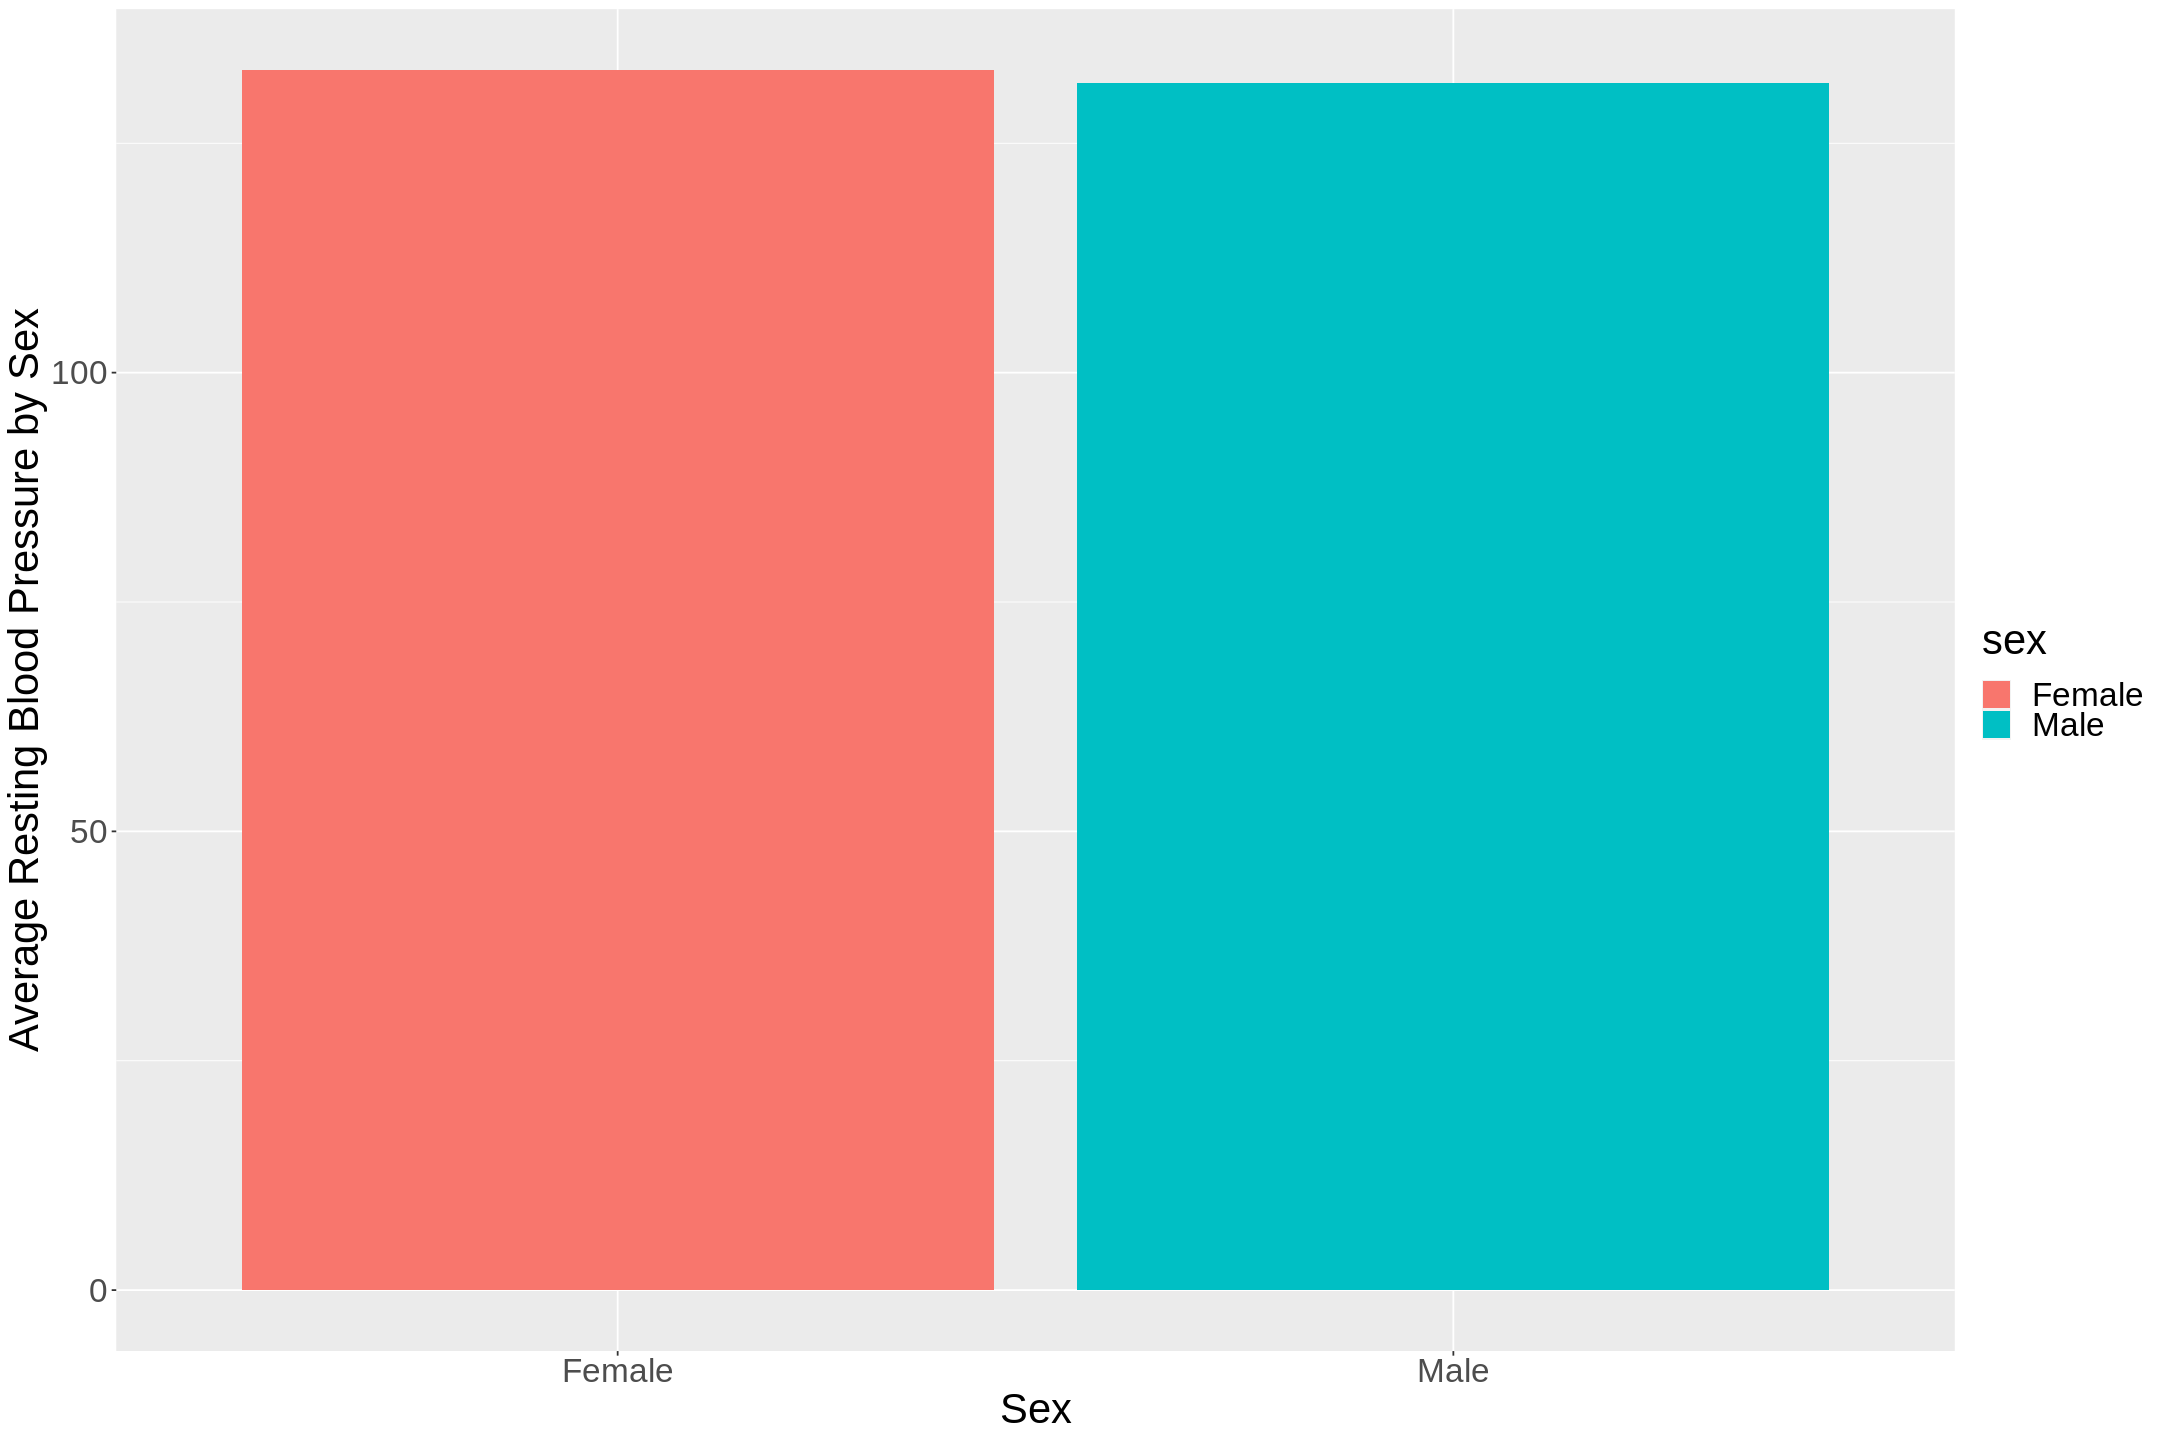

In [131]:
sex_trestbps <- specific_data |>
 filter(trestbps != "NA") |>
  group_by(sex, trestbps) |>
  count()

sex_trestbps_avrg <- sex_trestbps |>
  group_by(sex) |>
  summarize(avg_trestbps = mean(trestbps, na.rm = TRUE))

sex_trestbps_plot <- ggplot(sex_trestbps_avrg, aes(x = sex, y = avg_trestbps, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(x = "Sex", y = "Average Resting Blood Pressure by Sex") + 
  theme(text = element_text(size = 25))
sex_trestbps_plot


4. Find each gender’s most `resting electrocardiographic results` by `selecting` `sex`, and `restecg` columns. Then we are going to create a `bar` graph and `color` `males` and `females` differently.

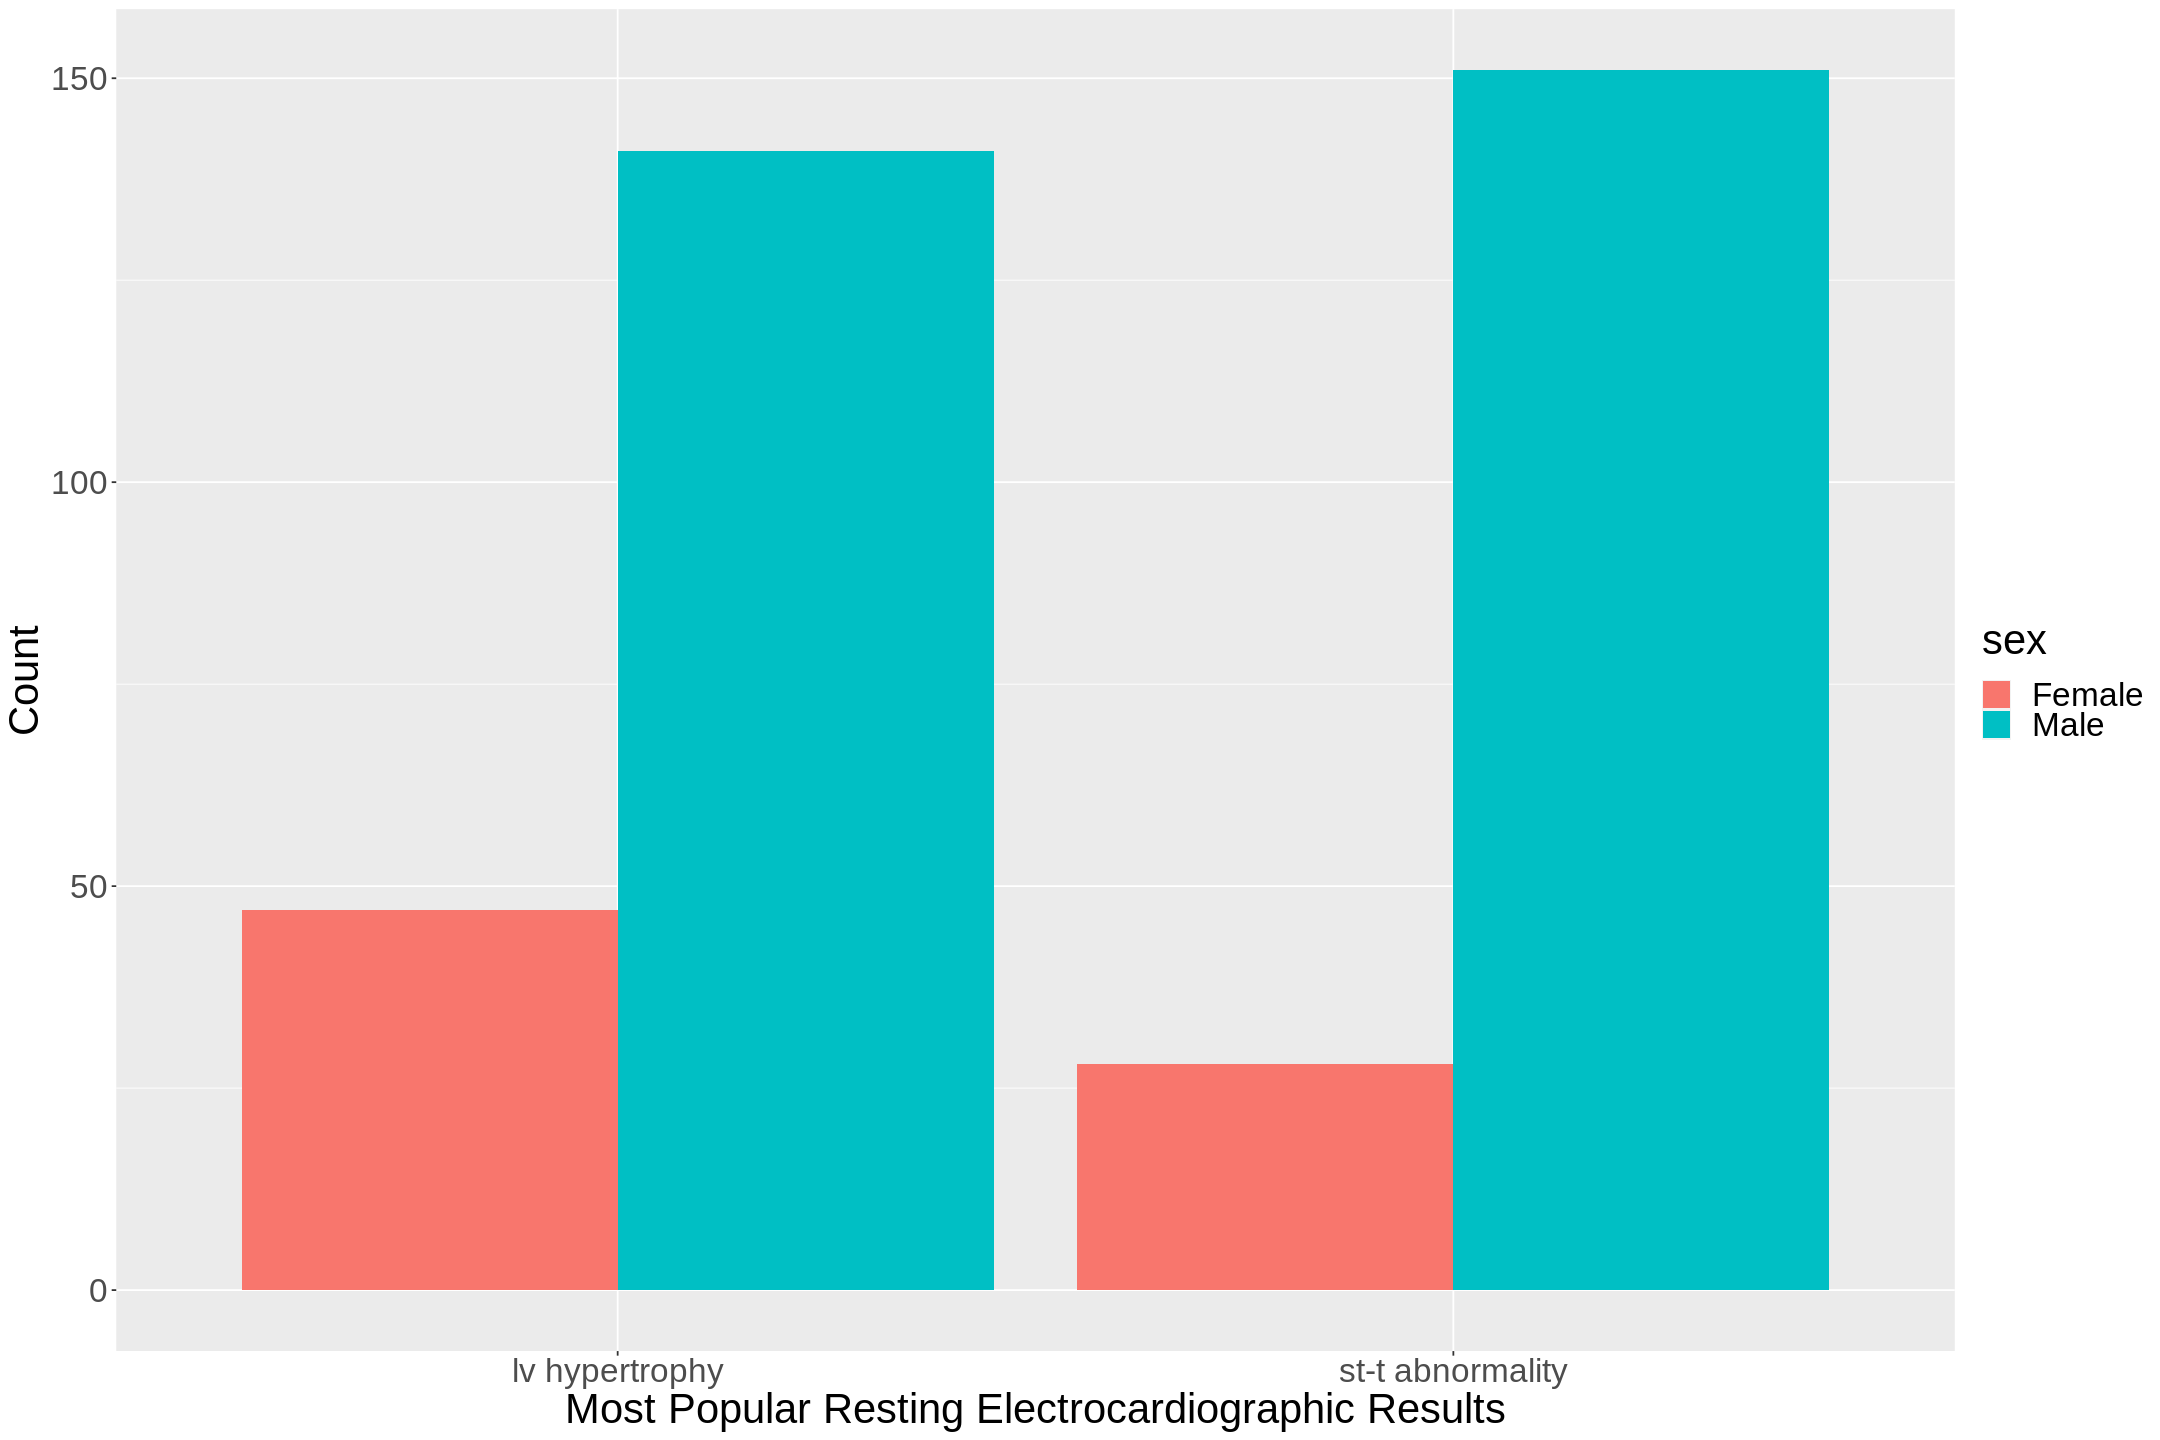

In [144]:
restecg_count <- specific_data |>
 filter(restecg != "normal") |>
  group_by(sex, restecg) |>
  count()

restecg_count_plot <- ggplot(restecg_count, aes(x = restecg, y = n, fill = sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Most Popular Resting Electrocardiographic Results", y = "Count") + 
  theme(text = element_text(size = 25))
restecg_count_plot

5. Comparing each gender by `maximum heart rate achieved` and finding which gender has `higher maximum heart rate achieved`. We are going to select `sex`, and `thalach` columns. Then we are going to `mutate` the data and find the `average thalach rate` for each `sex`. Then create the `bar` graph of `sex` against `average thalach rate` and `colour` `males` and `females` differently.


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


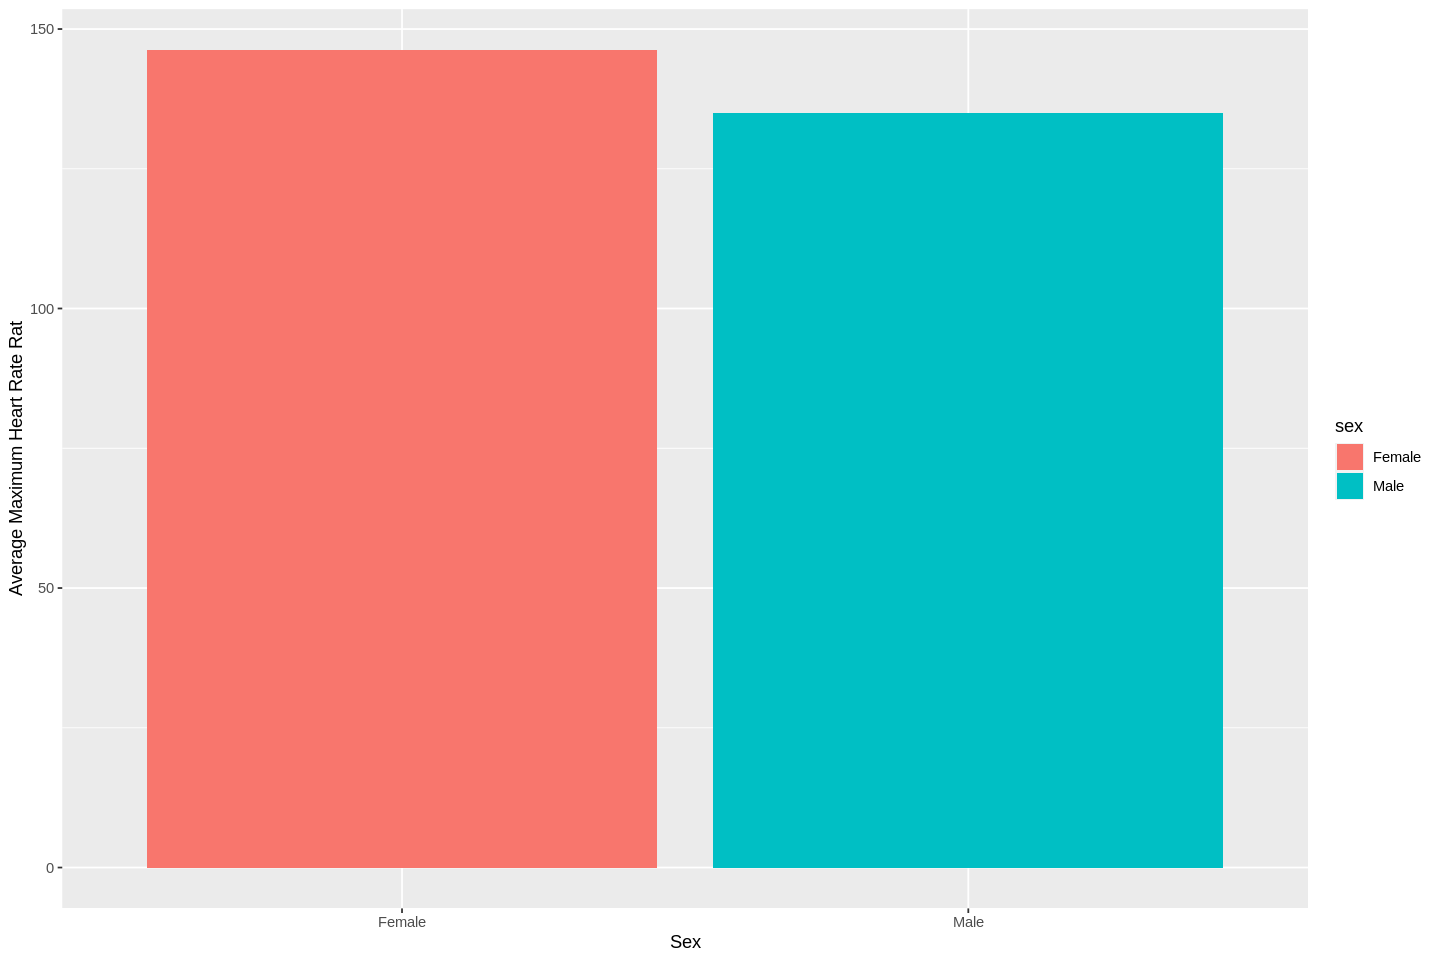

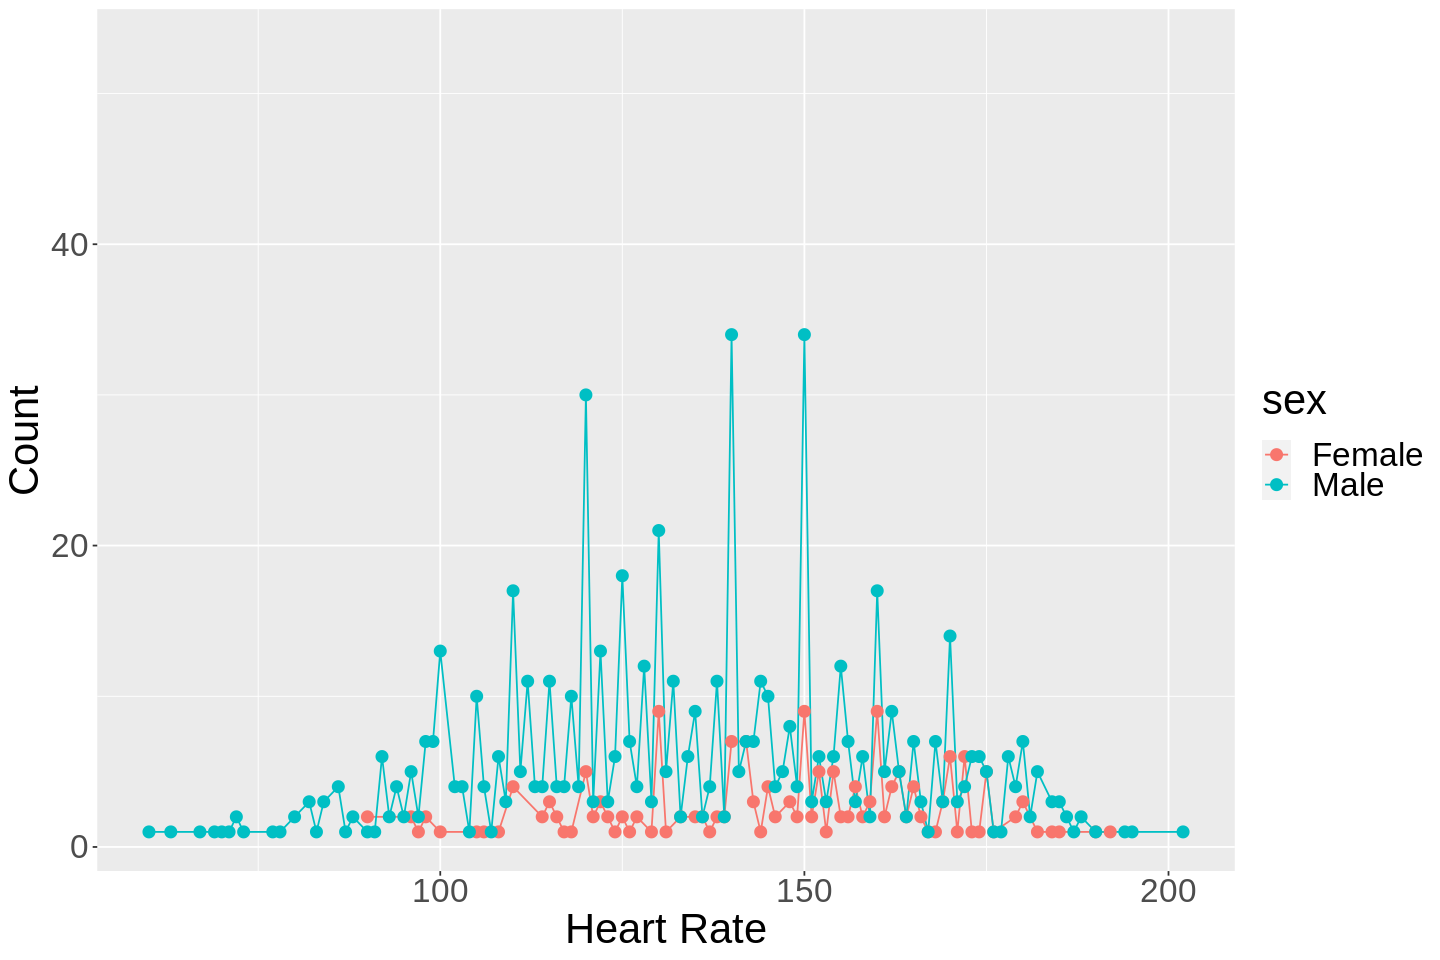

In [12]:
sex_thalch_avrg <- specific_data |>
  group_by(sex) |>
  summarize(avg_thalch = mean(thalch, na.rm = TRUE))

sex_thalch_avrg_plot <- ggplot(sex_thalch_avrg, aes(x = sex, y = avg_thalch, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(x = "Sex", y = "Average Maximum Heart Rate Rat")

sex_heart_rate <- specific_data |>
 filter(restecg != "NA") |>
  group_by(sex, thalch) |>
  count()

sex_heart_rate_plot <- ggplot(sex_heart_rate, aes(x = thalch, y = n, color = sex)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Heart Rate", y = "Count") +
    theme(text = element_text(size = 25))
sex_thalch_avrg_plot

sex_heart_rate_plot

**Results**: 

We have selected specific variables for our research because they are interrelated and provide sufficient information to address our research question. The variables we have chosen hold significant relevance in predicting heart conditions and assessing the risk of heart disease. Cholesterol levels play a crucial role as they indicate the presence of fatty deposits in blood vessels. Higher cholesterol levels are a strong indication of potential heart issues. Age is also an important variable since the risk of heart disease generally increases as individuals grow older. To ensure the accuracy of our predictions, we must consider resting blood pressure as a variable. High resting blood pressure is a major risk factor for heart disease and can help identify individuals prone to developing such conditions. Resting electrocardiographic data is another key factor in determining the risk of heart disease. Research conducted by Kaolawanich, Y., Thongsongsang, R., and Songsangjinda, T. has shown that abnormal resting electrocardiographic cardiogram readings are strong predictors of mortality and major adverse cardiac events. To enhance the reliability of our predictions, we have included the variable of maximum heart rate. Studies have demonstrated that a 10-beat per minute increase in heart rate is associated with a minimum 20% rise in the risk of cardiac death. Therefore, maximum heart rate is of utmost importance in determining gender-specific risk based on these variables.

### DISCUSSION



### REFERENCES

Bots, Sophie H, et al. “Sex Differences in Coronary Heart Disease and Stroke Mortality: A Global Assessment of the Effect of Ageing between 1980 and 2010.” BMJ Global Health, 1 Mar. 2017, gh.bmj.com/content/2/2/e000298.

“High Blood Pressure.” Heart and Stroke Foundation of Canada, www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure#:~:text=High%20blood%20pressure%20is%20the,blood%20through%20the%20blood%20vessels. Accessed 22 June 2023.

Kaolawanich, Yodying, et al. “Clinical Values of Resting Electrocardiography in Patients with Known or Suspected Chronic Coronary Artery Disease: A Stress Perfusion Cardiac MRI Study - BMC Cardiovascular Disorders.” BioMed Central, 28 Dec. 2021, bmccardiovascdisord.biomedcentral.com/articles/10.1186/s12872-021-02440-5#:~:text=Resting%20ECG%20abnormality%20has%20been,populations%20%5B10%2C%2011%5D.
“Know Your Risk for Heart Disease.” Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm.

Mayo Clinic. “High Cholesterol.” Mayo Clinic, 11 Jan. 2023, www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke.

Perret-Guillaume, Christine et al. “Heart rate as a risk factor for cardiovascular disease.” Progress in cardiovascular diseases vol. 52,1 (2009): 6-10. doi:10.1016/j.pcad.2009.05.003